In [ ]:
#Tolstik_Anna

In [2]:
import pandas as pd
import numpy as np
import scipy

from scipy import stats
import scipy.stats as ss
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.api import anova_lm
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
!pip install pingouin

In [3]:
df = pd.read_csv("exams.csv", sep = ',')

In [52]:
df

,gender,race,parent_education_level,lunch,test_prep_course,math
0,female,group B,bachelor's degree,standard,none,72
1,female,group C,some college,standard,completed,69
2,female,group B,master's degree,standard,none,90
3,male,group A,associate's degree,free/reduced,none,47
4,male,group C,some college,standard,none,76
...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88
996,male,group C,high school,free/reduced,none,62
997,female,group C,high school,free/reduced,completed,59
998,female,group D,some college,standard,completed,68


In [53]:
df.rename(columns={'race/ethnicity': 'race'})

,gender,race,parent_education_level,lunch,test_prep_course,math
0,female,group B,bachelor's degree,standard,none,72
1,female,group C,some college,standard,completed,69
2,female,group B,master's degree,standard,none,90
3,male,group A,associate's degree,free/reduced,none,47
4,male,group C,some college,standard,none,76
...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88
996,male,group C,high school,free/reduced,none,62
997,female,group C,high school,free/reduced,completed,59
998,female,group D,some college,standard,completed,68


In [54]:
df.race.value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race, dtype: int64

In [55]:
df_1=df.query('math>20')

<AxesSubplot:>

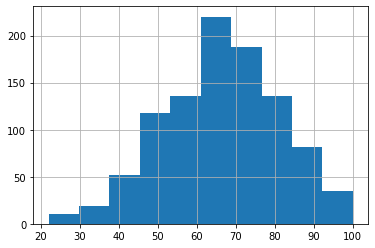

In [56]:
df_1.math.hist()

In [ ]:
#нулувая гипотеза, что различий между национальностью нет

In [113]:
a = df_1.query('race=="group A"').math
b = df_1.query('race=="group B"').math
c = df_1.query('race=="group C"').math
d = df_1.query('race=="group D"').math
e = df_1.query('race=="group E"').math

In [61]:
a = df_1.query('race=="group A"')
b = df_1.query('race=="group B"')
c = df_1.query('race=="group C"')
d = df_1.query('race=="group D"')
e = df_1.query('race=="group E"')

In [ ]:
#проверка дисперсий на однородность

In [39]:
scipy.stats.levene(a, b, c, d,e)

LeveneResult(statistic=0.5554664321392196, pvalue=0.6950737218982223)

In [ ]:
#принимаем 0 гипотезу

In [ ]:
# проверяем на нормальность распределения

In [64]:
a

,gender,race,parent_education_level,lunch,test_prep_course,math
3,male,group A,associate's degree,free/reduced,none,47
13,male,group A,some college,standard,completed,78
14,female,group A,master's degree,standard,none,50
25,male,group A,master's degree,free/reduced,none,73
46,female,group A,associate's degree,standard,completed,55
...,...,...,...,...,...,...
974,female,group A,some college,standard,none,54
983,female,group A,some college,standard,completed,78
985,male,group A,high school,standard,none,57
988,female,group A,some high school,free/reduced,none,44


In [67]:
print(ss.shapiro(a.math.sample(89, random_state=17)))

ShapiroResult(statistic=0.991736114025116, pvalue=0.8545348644256592)


In [68]:
print(ss.shapiro(b.math.sample(89, random_state=17)))

ShapiroResult(statistic=0.9928044080734253, pvalue=0.9132739305496216)


In [69]:
print(ss.shapiro(c.math.sample(89, random_state=17)))

ShapiroResult(statistic=0.9866896271705627, pvalue=0.5021828413009644)


In [70]:
print(ss.shapiro(d.math.sample(89, random_state=17)))

ShapiroResult(statistic=0.9902647733688354, pvalue=0.7564491629600525)


In [71]:
print(ss.shapiro(e.math.sample(89, random_state=17)))

ShapiroResult(statistic=0.9808697700500488, pvalue=0.21358738839626312)


In [ ]:
#распределение нормальное

In [ ]:
#однофакторный анализ

In [114]:
ss.f_oneway(a, b, c, d, e)

F_onewayResult(statistic=14.230353484366937, pvalue=2.6757865311025053e-11)

In [ ]:
#отклоняем 0 гипотезу

In [82]:
df_2=pairwise_tukeyhsd(df_1.math, df_1.race).summary()

In [87]:
df_2

group1,group2,meandiff,p-adj,lower,upper,reject
group A,group B,2.6007,0.6264,-2.4678,7.6693,False
group A,group C,3.0375,0.3985,-1.6824,7.7573,False
group A,group D,5.7334,0.0106,0.9045,10.5623,True
group A,group E,12.1922,0.0,6.8564,17.528,True
group B,group C,0.4367,0.9975,-3.1903,4.0638,False
group B,group D,3.1326,0.1548,-0.6352,6.9005,False
group B,group E,9.5915,0.0,5.1927,13.9903,True
group C,group D,2.6959,0.1647,-0.588,5.9799,False
group C,group E,9.1548,0.0,5.1627,13.1468,True
group D,group E,6.4588,0.0002,2.3384,10.5793,True


In [ ]:
#Нулевую гипотезу не принимаем, выбираем национальность Е (т.е. люди принадлежащщие к национальности Е имеют больший балл по математике)

In [96]:
df.gender.value_counts()

female    518
male      482
Name: gender, dtype: int64

In [120]:
f = df_1.query('gender=="female"').math
j = df_1.query('gender=="male"').math

In [122]:
ss.f_oneway(f, j)

F_onewayResult(statistic=25.636312987753477, pvalue=4.910666089618626e-07)

In [ ]:
#отклоняем 0 гипотезу, что различий нет

In [124]:
df_3=pairwise_tukeyhsd(df_1.math, df_1.gender).summary()
df_3

group1,group2,meandiff,p-adj,lower,upper,reject
female,male,4.6874,0.0,2.8707,6.504,True


In [ ]:
#у мужчин балл больше чем у женщин

In [129]:
df.test_prep_course.value_counts()

none         642
completed    358
Name: test_prep_course, dtype: int64

In [131]:
g = df_1.query('test_prep_course=="none"').math
k = df_1.query('test_prep_course=="completed"').math

In [132]:
ss.f_oneway(g, k)

F_onewayResult(statistic=30.19653677123524, pvalue=4.9608359860911716e-08)

In [ ]:
#отклоняем 0 гипотезу, что различий нет

In [133]:
df_3=pairwise_tukeyhsd(df_1.math, df_1.test_prep_course).summary()
df_3

group1,group2,meandiff,p-adj,lower,upper,reject
completed,none,-5.2864,0.0,-7.1743,-3.3986,True


In [ ]:
#у студентов прошедших курс балл выше